In [144]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [145]:
train = pd.read_csv(r"C:\Users\wlode\Downloads\train.csv\train.csv")

In [231]:
building = pd.read_csv(r"C:\Users\wlode\Downloads\building_metadata.csv")
weather = pd.read_csv(r"C:\Users\wlode\Downloads\weather_train.csv\weather_train.csv")

In [147]:
train.head()

building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            1      0  2016-01-01 00:00:00            0.0
2            2      0  2016-01-01 00:00:00            0.0
3            3      0  2016-01-01 00:00:00            0.0
4            4      0  2016-01-01 00:00:00            0.0

In [148]:
building.head()

site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN

In [149]:
weather.head()

site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   
1        0  2016-01-01 01:00:00             24.4             NaN   
2        0  2016-01-01 02:00:00             22.8             2.0   
3        0  2016-01-01 03:00:00             21.1             2.0   
4        0  2016-01-01 04:00:00             20.0             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN              1019.7             0.0   
1             21.1               -1.0              1020.2            70.0   
2             21.1                0.0              1020.2             0.0   
3             20.6                0.0              1020.1             0.0   
4             20.0               -1.0              1020.0           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6

In [150]:
train_building = train.merge(building, on='building_id')

In [151]:
train_building.head()

building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            0      0  2016-01-01 01:00:00            0.0        0   
2            0      0  2016-01-01 02:00:00            0.0        0   
3            0      0  2016-01-01 03:00:00            0.0        0   
4            0      0  2016-01-01 04:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  
0   Education         7432      2008.0          NaN  
1   Education         7432      2008.0          NaN  
2   Education         7432      2008.0          NaN  
3   Education         7432      2008.0          NaN  
4   Education         7432      2008.0          NaN

In [168]:
train_building_weather = pd.merge(train_building, weather, on=['site_id', 'timestamp'])

In [169]:
train_building_weather.head()

building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            1      0  2016-01-01 00:00:00            0.0        0   
2            2      0  2016-01-01 00:00:00            0.0        0   
3            3      0  2016-01-01 00:00:00            0.0        0   
4            4      0  2016-01-01 00:00:00            0.0        0   

  primary_use  square_feet  year_built  floor_count  air_temperature  \
0   Education         7432      2008.0          NaN             25.0   
1   Education         2720      2004.0          NaN             25.0   
2   Education         5376      1991.0          NaN             25.0   
3   Education        23685      2002.0          NaN             25.0   
4   Education       116607      1975.0          NaN             25.0   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             6.0             20.0                NaN              1019.7   
1             6.0             20.0                NaN              1019.7   
2             6.0             20.0                NaN              1019.7   
3             6.0             20.0                NaN              1019.7   
4             6.0             20.0                NaN              1019.7   

   wind_direction  wind_speed  
0             0.0         0.0  
1             0.0         0.0  
2             0.0         0.0  
3             0.0         0.0  
4             0.0         0.0

In [154]:
train_building_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20125605 entries, 0 to 20125604
Data columns (total 16 columns):
building_id           int64
meter                 int64
timestamp             object
meter_reading         float64
site_id               int64
primary_use           object
square_feet           int64
year_built            float64
floor_count           float64
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.5+ GB


In [155]:
import plotly.express as px

site0_dates = weather[weather['site_id'] == 0]['timestamp'] 
site0_temp = weather[weather['site_id'] == 0]['air_temperature'] 

px.line(x=site0_dates, y=site0_temp)

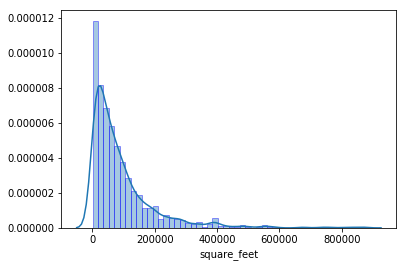

In [156]:
import matplotlib.pyplot as plt

sns.distplot(building['square_feet'], hist_kws=dict(edgecolor="b", linewidth=1))

[Text(0, 0, 'Education'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Entertainment/public assembly'),
 Text(0, 0, 'Public services'),
 Text(0, 0, 'Lodging/residential'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Parking')]

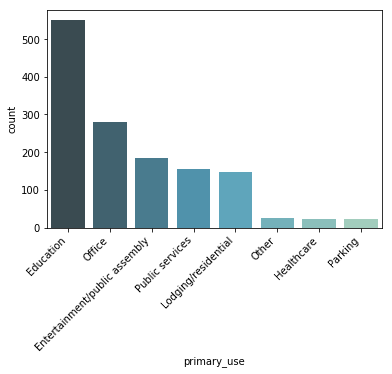

In [157]:
use = sns.countplot(x='primary_use', data=building, order=building['primary_use'].value_counts().iloc[:8].index, palette = "GnBu_d")
use.set_xticklabels(use.get_xticklabels(), rotation=45, horizontalalignment='right')

In [170]:
train_building_weather.isna().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12113306
floor_count           16630052
air_temperature           6163
cloud_coverage         8734870
dew_temperature           9645
precip_depth_1_hr      3658528
sea_level_pressure     1141174
wind_direction         1358553
wind_speed               53181
dtype: int64

In [171]:
train_building_weather[train_building_weather['meter_reading'] == 0.0]['meter_reading'].count()

1867887

In [172]:
from sklearn import preprocessing

In [173]:
use_encoded = pd.get_dummies(train_building_weather['primary_use'])

train_building_weather = pd.concat([train_building_weather, use_encoded], axis=1)
train_building_weather = train_building_weather.drop(columns='primary_use')

In [174]:
train_building_weather.head()

building_id  meter            timestamp  meter_reading  site_id  \
0            0      0  2016-01-01 00:00:00            0.0        0   
1            1      0  2016-01-01 00:00:00            0.0        0   
2            2      0  2016-01-01 00:00:00            0.0        0   
3            3      0  2016-01-01 00:00:00            0.0        0   
4            4      0  2016-01-01 00:00:00            0.0        0   

   square_feet  year_built  floor_count  air_temperature  cloud_coverage  ...  \
0         7432      2008.0          NaN             25.0             6.0  ...   
1         2720      2004.0          NaN             25.0             6.0  ...   
2         5376      1991.0          NaN             25.0             6.0  ...   
3        23685      2002.0          NaN             25.0             6.0  ...   
4       116607      1975.0          NaN             25.0             6.0  ...   

   Office  Other  Parking  Public services  Religious worship  Retail  \
0       0      0        0                0                  0       0   
1       0      0        0                0                  0       0   
2       0      0        0                0                  0       0   
3       0      0        0                0                  0       0   
4       0      0        0                0                  0       0   

   Services  Technology/science  Utility  Warehouse/storage  
0         0                   0        0                  0  
1         0                   0        0                  0  
2         0                   0        0                  0  
3         0                   0        0                  0  
4         0                   0        0                  0  

[5 rows x 31 columns]

In [175]:
train_building_weather.dropna(subset=['wind_speed', 'dew_temperature', 'air_temperature'], axis='rows', inplace=True)

In [176]:
train_building_weather.iloc[:, 0:15].isna().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
square_feet                  0
year_built            12065368
floor_count           16578967
air_temperature              0
cloud_coverage         8694783
dew_temperature              0
precip_depth_1_hr      3650871
sea_level_pressure     1132197
wind_direction         1305827
wind_speed                   0
dtype: int64

In [177]:
train_building_weather.drop(columns=['wind_direction', 'year_built', 'floor_count'], inplace=True)

In [179]:
train_building_weather = train_building_weather[train_building_weather.meter_reading != 0.0]

In [217]:
final = train_building_weather.iloc[:, 0:12]

In [218]:
final["cloud_coverage"].fillna(train_building_weather["cloud_coverage"].mean(), inplace=True)
final["precip_depth_1_hr"].fillna(train_building_weather["precip_depth_1_hr"].mean(), inplace=True)
final["sea_level_pressure"].fillna(train_building_weather["sea_level_pressure"].mean(), inplace=True)

In [219]:
final.head()

building_id  meter            timestamp  meter_reading  site_id  \
45            46      0  2016-01-01 00:00:00        53.2397        0   
72            74      0  2016-01-01 00:00:00        43.0013        0   
91            93      0  2016-01-01 00:00:00        52.4206        0   
123           20      0  2016-01-01 01:00:00        91.9886        0   
148           46      0  2016-01-01 01:00:00        53.6492        0   

     square_feet  air_temperature  cloud_coverage  dew_temperature  \
45          9045             25.0        6.000000             20.0   
72        387638             25.0        6.000000             20.0   
91         33370             25.0        6.000000             20.0   
123       110272             24.4        1.920971             21.1   
148         9045             24.4        1.920971             21.1   

     precip_depth_1_hr  sea_level_pressure  wind_speed  
45            0.793975              1019.7         0.0  
72            0.793975              1019.7         0.0  
91            0.793975              1019.7         0.0  
123          -1.000000              1020.2         1.5  
148          -1.000000              1020.2         1.5

In [220]:
final['meter_reading'].mean()

2347.0326552627116

In [221]:
final['meter_reading'].std()

161451.31378107672

In [222]:
final = final[final['meter_reading'] < 2000]

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [190]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [223]:
X_train, X_test, y_train, y_test = train_test_split(final.drop(['meter_reading', 'timestamp', 'building_id', 'site_id'], axis=1), final['meter_reading'], test_size=0.30, random_state=42)

In [224]:
LinRegression = LinearRegression()
LinRegression.fit(X_train, y_train)

predictions = LinRegression.predict(X_test)

In [225]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r2_score(y_test, predictions)

MAE: 179.8893545481951
MSE: 86053.80100216564
RMSE: 293.349281577722


0.23994593948127496

In [211]:
#sns.regplot(x=y_test, y=predictions)
#plt.xlabel('Y Test')
#plt.ylabel('Predicted Y')

In [112]:
from sklearn.neural_network import MLPRegressor

from sklearn.preprocessing import StandardScaler  

#scaler = StandardScaler()  
#scaler.fit(X_train)  
#X_train_scaled = scaler.transform(X_train)  
#X_test_scaled = scaler.transform(X_test) 

MLP = MLPRegressor(alpha=0.005, hidden_layer_sizes=10, max_iter=50)
MLP.fit(X_train, y_train)

predictions_MLP = pd.DataFrame(MLP.predict(X_test))

C:\Users\wlode\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning:

Training interrupted by user.



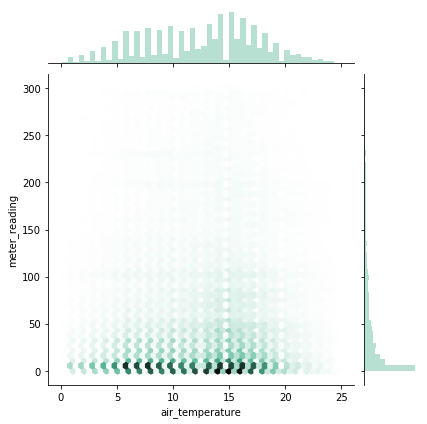

In [130]:
joint = final[(final['meter_reading'] < 300) & (final['air_temperature'] > 0) & (final['air_temperature'] < 25)]
sns.jointplot(joint['air_temperature'], joint['meter_reading'], kind='hex',color="#4CB391")

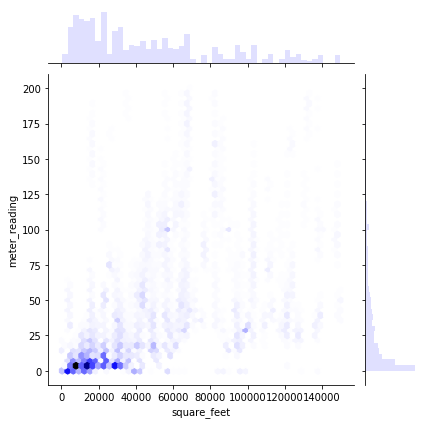

In [137]:
joint2 = final[(final['square_feet'] < 150000) & (final['meter_reading'] < 200)]
sns.jointplot(joint2['square_feet'], joint2['meter_reading'], kind='hex',color="#b2b2ff")

In [232]:
wp = weather[weather['site_id'] == 0][['timestamp', 'air_temperature']]

In [233]:
wp.head()

timestamp  air_temperature
0  2016-01-01 00:00:00             25.0
1  2016-01-01 01:00:00             24.4
2  2016-01-01 02:00:00             22.8
3  2016-01-01 03:00:00             21.1
4  2016-01-01 04:00:00             20.0

In [267]:
import fbprophet 
# Prophet requires columns ds (Date) and y (value)
wp = wp.rename(columns={'timestamp': 'ds', 'air_temperature': 'y'})

# Make the prophet model and fit on the data
wp_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True)
wp_prophet.fit(wp)

C:\Users\wlode\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [268]:
# Make a future dataframe for 2 years
wp_forecast = wp_prophet.make_future_dataframe(periods=365, freq='D')
# Make predictions
wp_forecast = wp_prophet.predict(wp_forecast)

In [269]:
wp_forecast.tail()

ds      trend  yhat_lower  yhat_upper  trend_lower  \
9144 2017-12-27 23:00:00  21.386469   16.334718   23.375754    21.011550   
9145 2017-12-28 23:00:00  21.383836   15.730081   23.133206    21.007419   
9146 2017-12-29 23:00:00  21.381204   15.147843   22.286699    21.004019   
9147 2017-12-30 23:00:00  21.378571   14.891221   21.990097    21.000819   
9148 2017-12-31 23:00:00  21.375939   14.363427   21.678554    20.996832   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
9144    21.802073       -1.492271             -1.492271             -1.492271   
9145    21.800765       -1.815456             -1.815456             -1.815456   
9146    21.799439       -2.452343             -2.452343             -2.452343   
9147    21.798136       -2.969908             -2.969908             -2.969908   
9148    21.796832       -3.638890             -3.638890             -3.638890   

         daily  ...    weekly  weekly_lower  weekly_upper    yearly  \
9144  1.906653  ...  0.154312      0.154312      0.154312 -3.553236   
9145  1.906653  ...  0.228569      0.228569      0.228569 -3.950678   
9146  1.906653  ...  0.005589      0.005589      0.005589 -4.364586   
9147  1.906653  ... -0.086031     -0.086031     -0.086031 -4.790530   
9148  1.906653  ... -0.321661     -0.321661     -0.321661 -5.223883   

      yearly_lower  yearly_upper  multiplicative_terms  \
9144     -3.553236     -3.553236                   0.0   
9145     -3.950678     -3.950678                   0.0   
9146     -4.364586     -4.364586                   0.0   
9147     -4.790530     -4.790530                   0.0   
9148     -5.223883     -5.223883                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper       yhat  
9144                         0.0                         0.0  19.894197  
9145                         0.0                         0.0  19.568380  
9146                         0.0                         0.0  18.928861  
9147                         0.0                         0.0  18.408664  
9148                         0.0                         0.0  17.737049  

[5 rows x 22 columns]

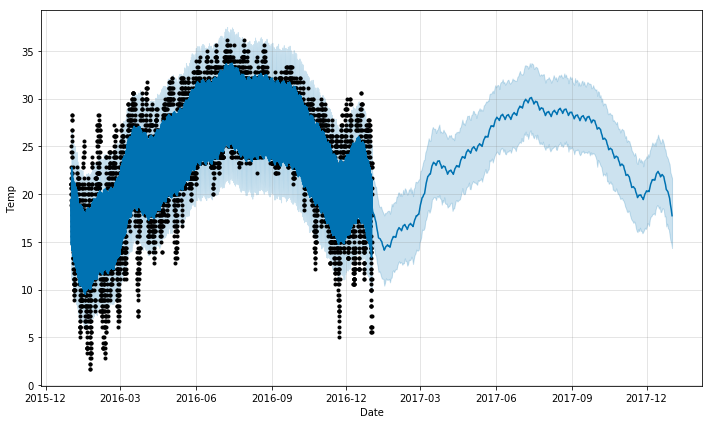

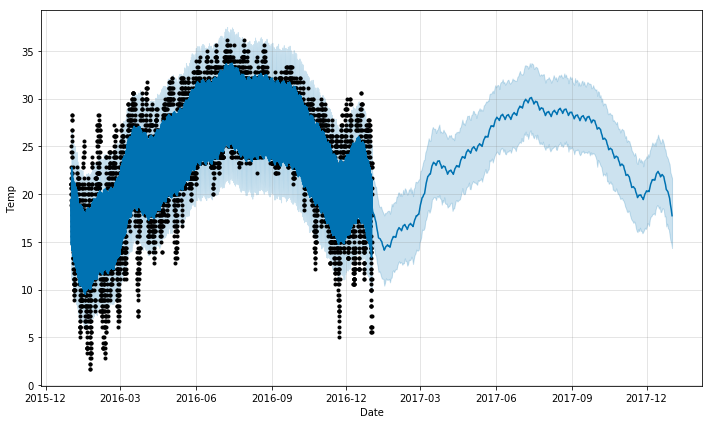

In [271]:
wp_prophet.plot(wp_forecast, xlabel = 'Date', ylabel = 'Temp')

In [289]:
wb = train_building[train_building['building_id'] == 3][['timestamp','meter_reading']]
wb.head()

timestamp  meter_reading
26352  2016-01-01 00:00:00            0.0
26353  2016-01-01 01:00:00            0.0
26354  2016-01-01 02:00:00            0.0
26355  2016-01-01 03:00:00            0.0
26356  2016-01-01 04:00:00            0.0

In [290]:
px.line(x=wb['timestamp'], y=wb['meter_reading'])

In [292]:
wb = wb.rename(columns={'timestamp': 'ds', 'meter_reading': 'y'})

# Make the prophet model and fit on the data
wb_prophet = fbprophet.Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True)
wb_prophet.fit(wb)

# Make a future dataframe for 2 years
wb_forecast = wb_prophet.make_future_dataframe(periods=365, freq='D')
# Make predictions
wb_forecast = wb_prophet.predict(wb_forecast)

C:\Users\wlode\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



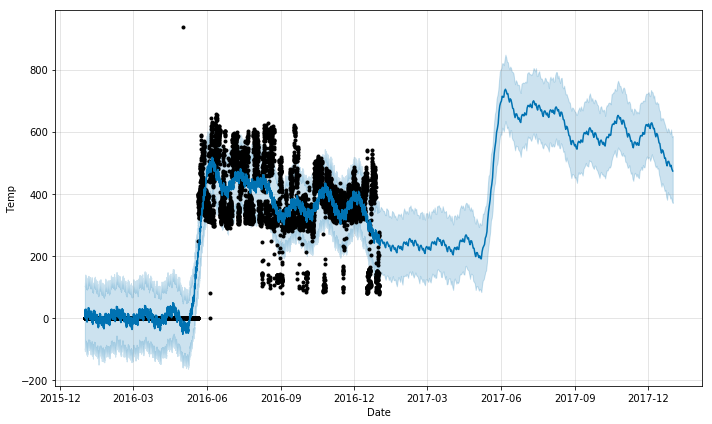

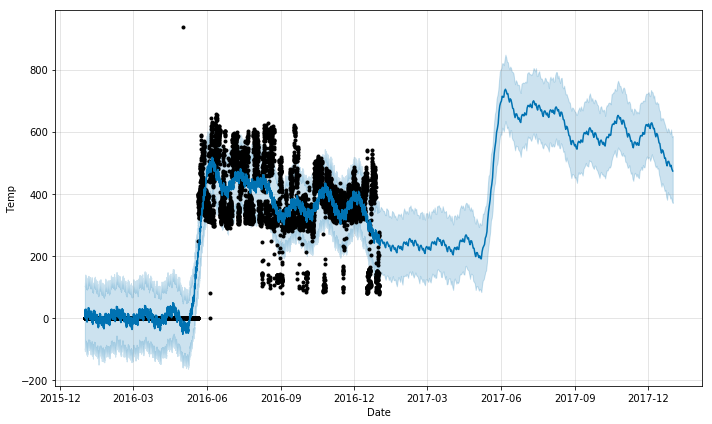

In [293]:
wb_prophet.plot(wb_forecast, xlabel = 'Date', ylabel = 'Temp')

In [336]:
average0 = train_building[train_building['site_id'] == 3].groupby('timestamp').mean()

In [337]:
average0.reset_index(inplace = True)

In [338]:
average0 = average0[['timestamp','meter_reading']]

In [340]:
plt = px.line(x=average0['timestamp'], y=average0['meter_reading'])
plt.update_yaxes(range=[-10, 400])

In [343]:
average0 = average0.rename(columns={'timestamp': 'ds', 'meter_reading': 'y'})

# Make the prophet model and fit on the data
average0_prophet = fbprophet.Prophet(changepoint_prior_scale=0.02, yearly_seasonality=True)
average0_prophet.fit(average0)

# Make a future dataframe for 2 years
average0_forecast = average0_prophet.make_future_dataframe(periods=365*2, freq='D')
# Make predictions
average0_forecast = average0_prophet.predict(average0_forecast)

C:\Users\wlode\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



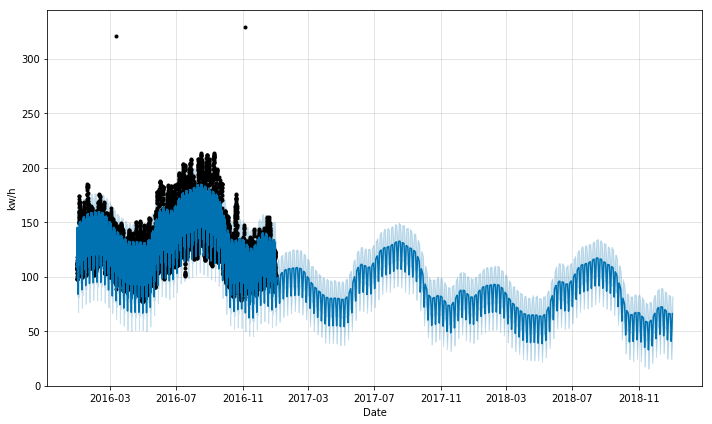

In [354]:
plt2 = average0_prophet.plot(average0_forecast, xlabel = 'Date', ylabel = 'kw/h')

In [360]:
px.line(x=average0_forecast['ds'], y=average0_forecast['yhat'])


In [361]:
train['building_id'].nunique()

1449

In [363]:
weather['site_id'].nunique()

16